In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels.api as sms

%matplotlib inline

In [2]:
kcd = pd.read_csv('King_County_House_prices_dataset.csv')

In [3]:
kcd.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
kcd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
kcd.shape

(21597, 21)

In [6]:
kcd.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,19221.00,21534.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4.580474e+09,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,0.23,3.41,7.66,1788.60,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,2.876736e+09,367368.14,0.93,0.77,918.11,41412.64,0.54,0.09,0.77,0.65,1.17,827.76,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,1.000102e+06,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.123049e+09,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7.308900e+09,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,0.00,4.00,8.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


In [7]:
kcd

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [8]:
kcd["id"]

0        7129300520
1        6414100192
2        5631500400
3        2487200875
4        1954400510
            ...    
21592     263000018
21593    6600060120
21594    1523300141
21595     291310100
21596    1523300157
Name: id, Length: 21597, dtype: int64

In [9]:
kcd[5:15]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570
10,1736800520,4/3/2015,662500.0,3,2.50,3560,9796,1.0,NaN,0.0,...,8,1860,1700.0,1965,0.0,98007,47.6007,-122.145,2210,8925
11,9212900260,5/27/2014,468000.0,2,1.00,1160,6000,1.0,0.0,0.0,...,7,860,300.0,1942,0.0,98115,47.6900,-122.292,1330,6000
12,114101516,5/28/2014,310000.0,3,1.00,1430,19901,1.5,0.0,0.0,...,7,1430,0.0,1927,NaN,98028,47.7558,-122.229,1780,12697
13,6054650070,10/7/2014,400000.0,3,1.75,1370,9680,1.0,0.0,0.0,...,7,1370,0.0,1977,0.0,98074,47.6127,-122.045,1370,10208
14,1175000570,3/12/2015,530000.0,5,2.00,1810,4850,1.5,0.0,0.0,...,7,1810,0.0,1900,0.0,98107,47.6700,-122.394,1360,4850


In [10]:
kcd.loc[10:15, ['sqft_living', 'floors']]

,sqft_living,floors
10,3560,1.0
11,1160,1.0
12,1430,1.5
13,1370,1.0
14,1810,1.5
15,2950,2.0


In [11]:
kcd[10:20:3]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10,1736800520,4/3/2015,662500.0,3,2.50,3560,9796,1.0,NaN,0.0,...,8,1860,1700.0,1965,0.0,98007,47.6007,-122.145,2210,8925
13,6054650070,10/7/2014,400000.0,3,1.75,1370,9680,1.0,0.0,0.0,...,7,1370,0.0,1977,0.0,98074,47.6127,-122.045,1370,10208
16,1875500060,7/31/2014,395000.0,3,2.00,1890,14040,2.0,0.0,0.0,...,7,1890,0.0,1994,0.0,98019,47.7277,-121.962,1890,14018
19,7983200060,4/24/2015,230000.0,3,1.00,1250,9774,1.0,0.0,0.0,...,7,1250,0.0,1969,0.0,98003,47.3343,-122.306,1280,8850


In [12]:
kcd['waterfront'].unique()

array([nan,  0.,  1.])

In [13]:
kcd[:10]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [14]:
kcd.groupby('floors')

In [15]:
groupby_obj = kcd.groupby('floors')

In [16]:
kcd.sort_values('floors')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
11155,7567600030,1/27/2015,750000.0,5,1.75,2640,13290,1.0,1.0,4.0,...,8,1400,1240.0,1954,0.0,98178,47.5022,-122.223,2400,11942
11157,4123800400,9/9/2014,290000.0,3,2.00,1700,6498,1.0,0.0,0.0,...,7,1700,0.0,1986,0.0,98038,47.3781,-122.044,1700,6654
11158,9424400105,7/10/2014,525000.0,4,1.75,2280,5959,1.0,0.0,0.0,...,7,1250,1030.0,1947,0.0,98116,47.5655,-122.395,1640,5911
11162,5710610520,2/26/2015,454900.0,3,1.75,2130,9775,1.0,0.0,0.0,...,8,1430,700.0,1973,0.0,98027,47.5326,-122.049,2130,11250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15410,1702900664,4/16/2015,479000.0,2,2.50,1730,1037,3.5,0.0,0.0,...,8,1730,0.0,2008,0.0,98118,47.5594,-122.285,1280,1026
14871,8673400177,4/2/2015,525000.0,3,3.00,1730,1074,3.5,0.0,0.0,...,8,1730,0.0,2006,0.0,98107,47.6692,-122.392,1370,1185
20756,1972200428,6/25/2014,563500.0,3,2.50,1400,1312,3.5,NaN,0.0,...,8,1400,0.0,2007,NaN,98103,47.6534,-122.355,1350,1312
18462,1346300150,10/20/2014,3300000.0,8,4.00,7710,11750,3.5,0.0,0.0,...,12,6090,1620.0,1904,0.0,98112,47.6263,-122.314,4210,8325


In [17]:
kcd.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,19221.00,21534.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4.580474e+09,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,0.23,3.41,7.66,1788.60,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,2.876736e+09,367368.14,0.93,0.77,918.11,41412.64,0.54,0.09,0.77,0.65,1.17,827.76,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,1.000102e+06,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.123049e+09,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7.308900e+09,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,0.00,4.00,8.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


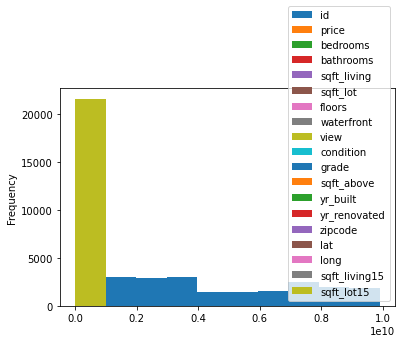

In [18]:
kcd.plot(kind = "hist")

In [19]:
kcd.sort_values('price', ascending=True)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15279,40000362,5/6/2014,78000.0,2,1.00,780,16344,1.0,0.0,0.0,...,5,780,0.0,1942,NaN,98168,47.4739,-122.280,1700,10387
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,NaN,0.0,...,4,430,0.0,1912,0.0,98014,47.6499,-121.909,1200,7500
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,NaN,0.0,...,5,730,0.0,1943,0.0,98168,47.4808,-122.315,860,9000
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0.0,0.0,...,6,860,0.0,1954,0.0,98146,47.4987,-122.341,1140,11250
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0.0,0.0,...,5,520,0.0,1951,0.0,98168,47.4799,-122.296,1572,10570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0.0,4.0,...,12,6720,1280.0,2009,0.0,98004,47.6232,-122.220,4600,21750
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0.0,0.0,...,13,6200,3000.0,2001,NaN,98039,47.6289,-122.233,3560,24345
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0.0,4.0,...,13,8860,1030.0,2001,0.0,98039,47.6305,-122.240,4540,42730
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1.0,2.0,...,11,7680,2360.0,1940,2001.0,98004,47.6500,-122.214,3930,25449


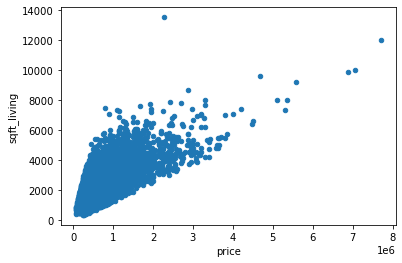

In [20]:
kcd.plot(kind='scatter', x='price', y='sqft_living')

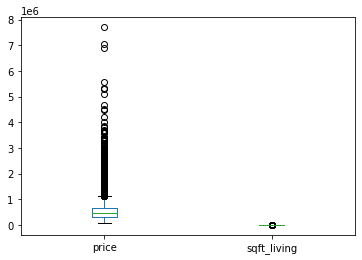

In [21]:
kcd[["price", 'sqft_living']].plot(kind='box')

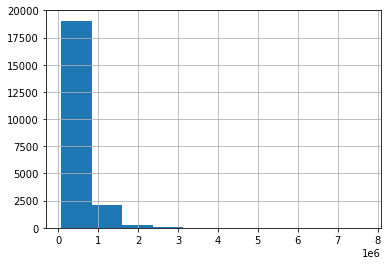

In [22]:
kcd.price.hist()

In [23]:
kcd.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [24]:
kcd.price.sum()

11668785098.0

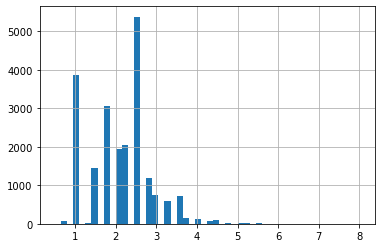

In [25]:
kcd.bathrooms.hist(bins = 50); # 

In [26]:
kcd.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

In [27]:
kcd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [28]:
kcd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [29]:
kcd.floors.value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

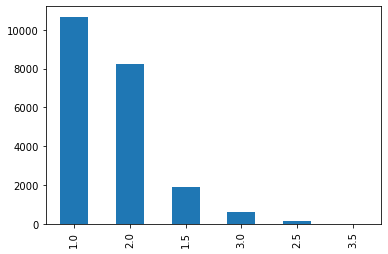

In [30]:
kcd.floors.value_counts().plot(kind='bar')

In [31]:
from pandas.plotting import scatter_matrix

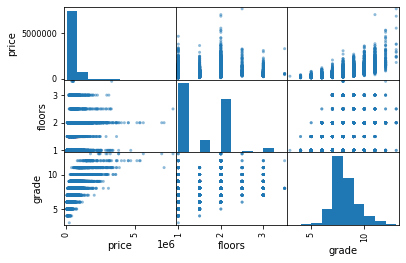

In [32]:
scatter_matrix(kcd[["price", "floors", "grade"]],
              diagonal='hist');

In [33]:
kcd['floors'].apply(lambda x: x + 9)

0        10.0
1        11.0
2        10.0
3        10.0
4        10.0
         ... 
21592    12.0
21593    11.0
21594    11.0
21595    11.0
21596    11.0
Name: floors, Length: 21597, dtype: float64

In [34]:
kcd.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [35]:
kcd[100:104].floors.values

array([1.5, 1.5, 2. , 2. ])

In [36]:
kcd.groupby('floors').mean()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
floors,,,,,,,,,,,,,,,,,,
1.0,4.517502e+09,4.423584e+05,3.162466,1.752506,1732.619601,14546.515506,0.005583,0.213474,3.551391,7.150942,1331.707861,1960.403354,74.480417,98081.192073,47.555795,-122.234720,1777.932540,12524.354258
1.5,4.549761e+09,5.590449e+05,3.506283,1.771728,1907.880628,16966.476440,0.009518,0.250657,3.689529,7.192670,1646.653403,1935.107330,142.469089,98102.585340,47.590323,-122.274702,1761.948691,13203.650785
2.0,4.677970e+09,6.491856e+05,3.633880,2.623619,2571.412386,16137.975956,0.009388,0.247473,3.187978,8.360413,2398.808257,1990.718640,83.081307,98065.362356,47.550838,-122.163945,2330.458531,13576.515604
2.5,4.578060e+09,1.061021e+06,3.987578,2.835404,3145.428571,17347.291925,0.013793,0.503145,3.478261,8.894410,2789.857143,1961.310559,257.401515,98092.503106,47.586585,-122.243913,2349.745342,17118.993789
3.0,4.481488e+09,5.834339e+05,2.962357,2.495499,1789.418985,4471.864157,0.010989,0.283142,3.036007,8.163666,1720.273322,2004.854337,20.375510,98109.855974,47.657520,-122.327088,1606.396072,3394.880524
3.5,2.974186e+09,9.102143e+05,3.428571,2.892857,2440.000000,2792.285714,0.000000,0.285714,3.285714,8.571429,2208.571429,1990.714286,0.000000,98107.285714,47.640429,-122.332143,1814.285714,2315.285714


In [37]:
kcd["floors"]

0        1.0
1        2.0
2        1.0
3        1.0
4        1.0
        ... 
21592    3.0
21593    2.0
21594    2.0
21595    2.0
21596    2.0
Name: floors, Length: 21597, dtype: float64

In [38]:
kcd.floors.mean()

1.4940964022780943

In [39]:
kcd.floors.median()

1.5

In [40]:
kcd.floors.mode()

0    1.0
dtype: float64

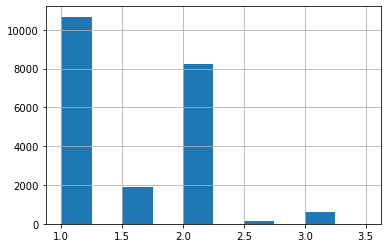

In [41]:
kcd.floors.hist(); 

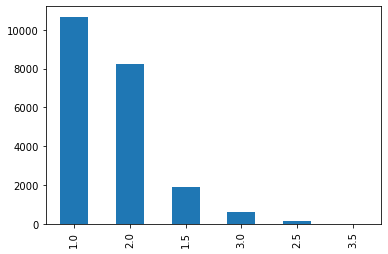

In [42]:
kcd.floors.value_counts().plot.bar();

In [43]:
kcd.floors.min()

1.0

In [44]:
kcd.floors.max()

3.5

In [45]:
kcd.floors.var()

0.29125751487733803

In [46]:
kcd.floors.std()

0.5396827909775687

In [47]:
kcd.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,19221.00,21534.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4.580474e+09,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,0.23,3.41,7.66,1788.60,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,2.876736e+09,367368.14,0.93,0.77,918.11,41412.64,0.54,0.09,0.77,0.65,1.17,827.76,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,1.000102e+06,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.123049e+09,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7.308900e+09,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,0.00,4.00,8.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


In [48]:
kcd.describe(include="all").round(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,19221.00,21534.00,...,21597.00,21597.00,21597,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,304,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,6/23/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,12826,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580474e+09,NaN,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,0.23,...,7.66,1788.60,NaN,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,2.876736e+09,NaN,367368.14,0.93,0.77,918.11,41412.64,0.54,0.09,0.77,...,1.17,827.76,NaN,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,1.000102e+06,NaN,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,...,3.00,370.00,NaN,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.123049e+09,NaN,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,...,7.00,1190.00,NaN,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3.904930e+09,NaN,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,...,7.00,1560.00,NaN,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7.308900e+09,NaN,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,0.00,...,8.00,2210.00,NaN,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00


In [49]:
kcd.T

,0,1,2,3,4,5,6,7,8,9,...,21587,21588,21589,21590,21591,21592,21593,21594,21595,21596
id,7129300520,6414100192,5631500400,2487200875,1954400510,7237550310,1321400060,2008000270,2414600126,3793500160,...,7852140040,9834201367,3448900210,7936000429,2997800021,263000018,6600060120,1523300141,291310100,1523300157
date,10/13/2014,12/9/2014,2/25/2015,12/9/2014,2/18/2015,5/12/2014,6/27/2014,1/15/2015,4/15/2015,3/12/2015,...,8/25/2014,1/26/2015,10/14/2014,3/26/2015,2/19/2015,5/21/2014,2/23/2015,6/23/2014,1/16/2015,10/15/2014
price,221900,538000,180000,604000,510000,1.23e+06,257500,291850,229500,323000,...,507250,429000,610685,1.01e+06,475000,360000,400000,402101,400000,325000
bedrooms,3,3,2,4,3,4,3,3,3,3,...,3,3,4,4,3,3,4,2,3,2
bathrooms,1,2.25,1,3,2,4.5,2.25,1.5,1,2.5,...,2.5,2,2.5,3.5,2.5,2.5,2.5,0.75,2.5,0.75
sqft_living,1180,2570,770,1960,1680,5420,1715,1060,1780,1890,...,2270,1490,2520,3510,1310,1530,2310,1020,1600,1020
sqft_lot,5650,7242,10000,5000,8080,101930,6819,9711,7470,6560,...,5536,1126,6023,7200,1294,1131,5813,1350,2388,1076
floors,1,2,1,1,1,1,2,1,1,2,...,2,3,2,2,2,3,2,2,2,2
waterfront,NaN,0,0,0,0,0,0,0,0,0,...,NaN,0,0,0,0,0,0,0,NaN,0
view,0,0,0,0,0,0,0,NaN,0,0,...,0,0,NaN,0,0,0,0,0,0,0


In [50]:
kcd.T

,0,1,2,3,4,5,6,7,8,9,...,21587,21588,21589,21590,21591,21592,21593,21594,21595,21596
id,7129300520,6414100192,5631500400,2487200875,1954400510,7237550310,1321400060,2008000270,2414600126,3793500160,...,7852140040,9834201367,3448900210,7936000429,2997800021,263000018,6600060120,1523300141,291310100,1523300157
date,10/13/2014,12/9/2014,2/25/2015,12/9/2014,2/18/2015,5/12/2014,6/27/2014,1/15/2015,4/15/2015,3/12/2015,...,8/25/2014,1/26/2015,10/14/2014,3/26/2015,2/19/2015,5/21/2014,2/23/2015,6/23/2014,1/16/2015,10/15/2014
price,221900,538000,180000,604000,510000,1.23e+06,257500,291850,229500,323000,...,507250,429000,610685,1.01e+06,475000,360000,400000,402101,400000,325000
bedrooms,3,3,2,4,3,4,3,3,3,3,...,3,3,4,4,3,3,4,2,3,2
bathrooms,1,2.25,1,3,2,4.5,2.25,1.5,1,2.5,...,2.5,2,2.5,3.5,2.5,2.5,2.5,0.75,2.5,0.75
sqft_living,1180,2570,770,1960,1680,5420,1715,1060,1780,1890,...,2270,1490,2520,3510,1310,1530,2310,1020,1600,1020
sqft_lot,5650,7242,10000,5000,8080,101930,6819,9711,7470,6560,...,5536,1126,6023,7200,1294,1131,5813,1350,2388,1076
floors,1,2,1,1,1,1,2,1,1,2,...,2,3,2,2,2,3,2,2,2,2
waterfront,NaN,0,0,0,0,0,0,0,0,0,...,NaN,0,0,0,0,0,0,0,NaN,0
view,0,0,0,0,0,0,0,NaN,0,0,...,0,0,NaN,0,0,0,0,0,0,0


In [51]:
kcd.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [52]:
kcd.groupby("floors").count()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
floors,,,,,,,,,,,,,,,,,,,,
1.0,10673,10673,10673,10673,10673,10673,10673,9493,10643,10673,10673,10673,10673,10673,8732,10673,10673,10673,10673,10673
1.5,1910,1910,1910,1910,1910,1910,1910,1681,1903,1910,1910,1910,1910,1910,1569,1910,1910,1910,1910,1910
2.0,8235,8235,8235,8235,8235,8235,8235,7350,8211,8235,8235,8235,8235,8235,6826,8235,8235,8235,8235,8235
2.5,161,161,161,161,161,161,161,145,159,161,161,161,161,161,132,161,161,161,161,161
3.0,611,611,611,611,611,611,611,546,611,611,611,611,611,611,490,611,611,611,611,611
3.5,7,7,7,7,7,7,7,6,7,7,7,7,7,7,6,7,7,7,7,7


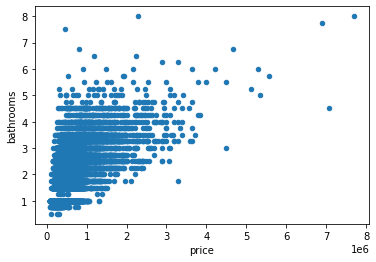

In [53]:
kcd.plot(kind="scatter", x = "price", y = "bathrooms")

In [54]:
kcd_test = kcd.query('floors == "3.5"')
kcd_test.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10066,1972202010,8/1/2014,435000.0,3,3.0,1440,1350,3.5,0.0,2.0,...,8,1440,0.0,2005,0.0,98103,47.6525,-122.345,1440,1350
11582,3180100023,1/30/2015,544000.0,3,2.5,1760,1755,3.5,0.0,0.0,...,8,1760,0.0,1998,0.0,98105,47.6688,-122.279,1700,1721
14871,8673400177,4/2/2015,525000.0,3,3.0,1730,1074,3.5,0.0,0.0,...,8,1730,0.0,2006,0.0,98107,47.6692,-122.392,1370,1185
15410,1702900664,4/16/2015,479000.0,2,2.5,1730,1037,3.5,0.0,0.0,...,8,1730,0.0,2008,0.0,98118,47.5594,-122.285,1280,1026
18462,1346300150,10/20/2014,3300000.0,8,4.0,7710,11750,3.5,0.0,0.0,...,12,6090,1620.0,1904,0.0,98112,47.6263,-122.314,4210,8325


In [55]:
kcd.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [56]:
kcd.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

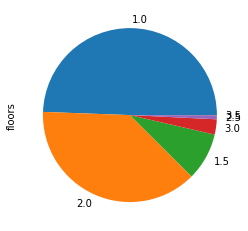

In [57]:
kcd.floors.value_counts().plot.pie()

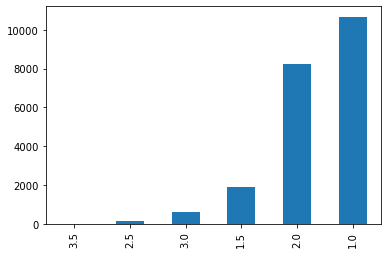

In [58]:
kcd.floors.value_counts(ascending = True).plot.bar();

In [59]:
kcd.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639


In [60]:
kcd.head(n=2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639


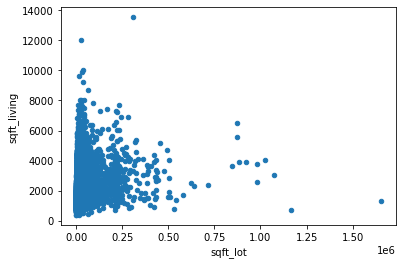

In [61]:
fig = kcd.plot(x='sqft_lot', 
          y='sqft_living', 
          kind='scatter');

In [62]:
kcd.sqft_lot.max()

1651359

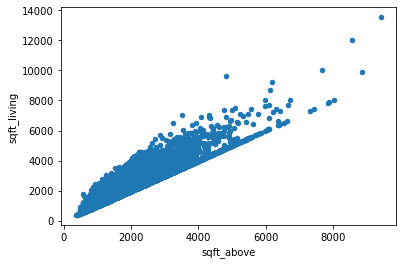

In [74]:
fig = kcd.plot(kind="scatter", x = "sqft_above", y = "sqft_living")

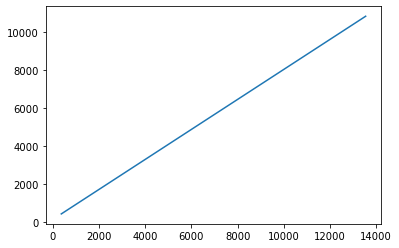

In [66]:
plt.plot(np.unique(kcd.sqft_living), np.poly1d(np.polyfit(kcd.sqft_living, kcd.sqft_above, 1))(np.unique(kcd.sqft_living)));

In [67]:
X = kcd[['sqft_above']]
X = sms.add_constant(X) # Benötige ich, damit nicht vom Nullpunkt, sondern vom Intercept gestartet wird
X.head()

,const,sqft_above
0,1.0,1180
1,1.0,2170
2,1.0,770
3,1.0,1050
4,1.0,1680


In [75]:
y = kcd.sqft_living
y.head()

0    1180
1    2570
2     770
3    1960
4    1680
Name: sqft_living, dtype: int64

In [76]:
model = sms.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sqft_living   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                 7.155e+04
Date:                Mon, 14 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:40:52   Log-Likelihood:            -1.6220e+05
No. Observations:               21597   AIC:                         3.244e+05
Df Residuals:                   21595   BIC:                         3.244e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        341.6122      7.162     47.695      0.000     327.573     355.651
sqft_above     0.9721      0.004    267.491      0.000       0.965       0.979
==============================================================================
Omnibus:                     6569.562   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18181.691
Skew:                           1.631   Prob(JB):                         0.00
Kurtosis:                       6.092   Cond. No.                     4.69e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

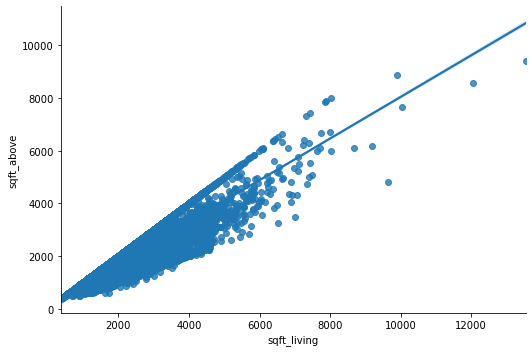

In [79]:
sns.lmplot('sqft_living', 'sqft_above', data=kcd, aspect=1.5);

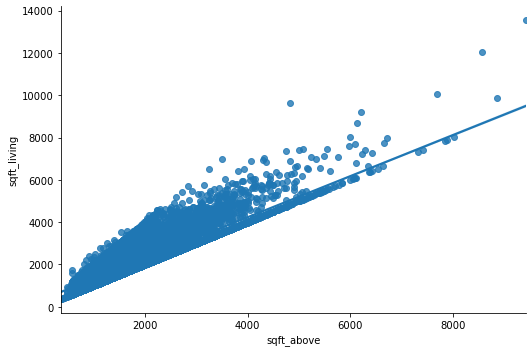

In [80]:
sns.lmplot('sqft_above', 'sqft_living', data=kcd, aspect=1.5);

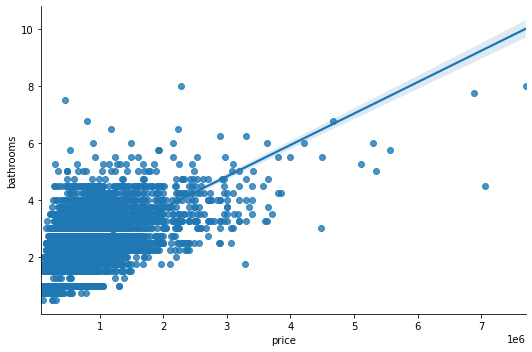

In [84]:
sns.lmplot('price', 'bathrooms', data=kcd, aspect=1.5);